<a href="https://colab.research.google.com/github/ayumitakayuki/artificial_intelligence/blob/main/LinerRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# Load the uploaded dataset
file_path = 'WasteManagementAndOverallRecyclingRatesAnnual.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,DataSeries,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Total Generated,6859000,7385000,6944000,5880000,7234000,7695000,7704300,7814200,7673500,7514500,7851500,7269503
1,Construction Debris,832000,1424000,1013000,825000,1440000,1624000,1609300,1595400,1411800,1269700,1695300,1291832
2,Ferrous Metal,1296000,1338000,1312000,934000,1278000,1269000,1378800,1357500,1348500,1445900,1416000,1385938
3,Non-Ferrous Metal,106000,92000,88000,75000,126000,171000,93700,97200,180000,118400,135100,122467
4,Used Slag,176000,169000,182000,106000,129000,181000,272500,251100,369900,366300,353700,367863


TypeError: 'value' must be an instance of str or bytes, not a int

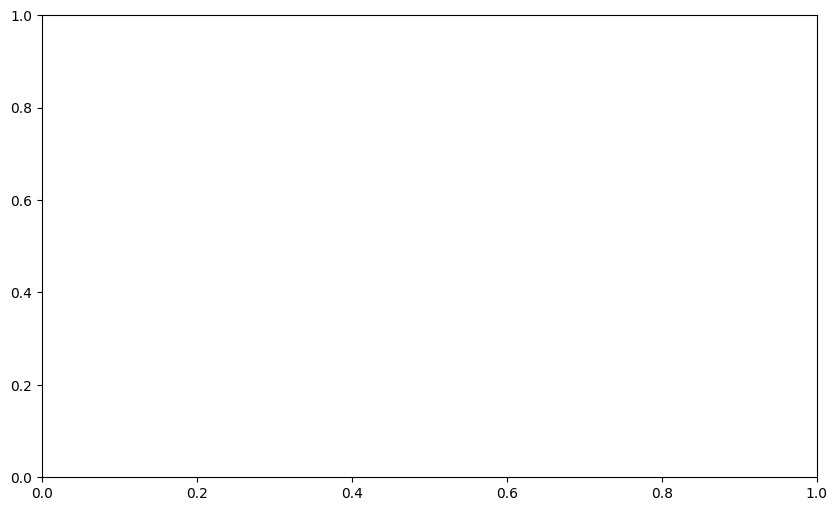

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Extract the relevant data for "Total Generated"
total_generated_data = data[data['DataSeries'] == 'Total Generated'].iloc[:, 1:]

# Transpose the data to get years as independent variables and volume as dependent
years = total_generated_data.columns.astype(int).values.reshape(-1, 1)
volumes = total_generated_data.values.flatten()

# Create and train the linear regression model
model = LinearRegression()
model.fit(years, volumes)

# Predict the volume for 2024
predicted_2024 = model.predict(np.array([[2024]]))[0]

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(years, volumes, color='blue', label='Actual Data')
plt.plot(years, model.predict(years), color='red', label='Regression Line')
plt.scatter(2024, predicted_2024, color='green', label='Prediction for 2024', zorder=5)
plt.title("Prediction of Total Waste Volume for 2024")
plt.xlabel("Year")
plt.ylabel("Volume of Waste")
plt.legend()
plt.grid(True)
plt.show()

predicted_2024


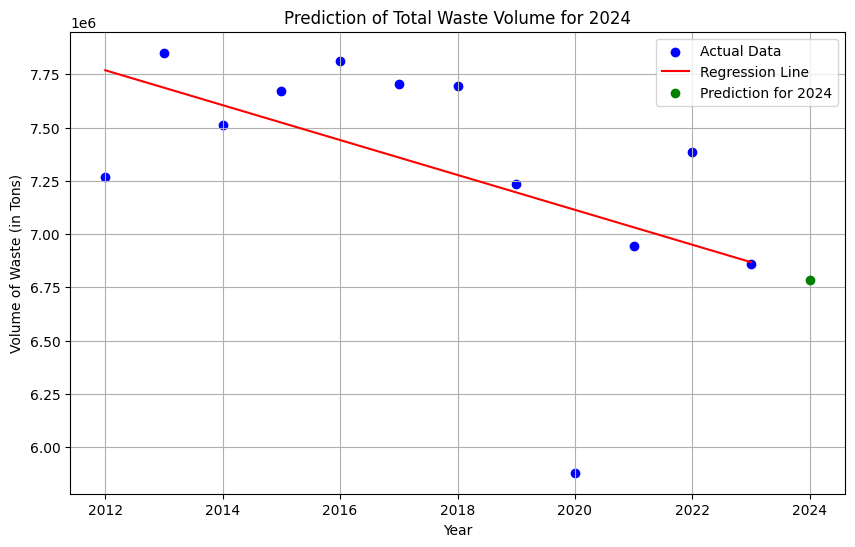

6786323.74242425

In [12]:
# Convert the volume data to numeric
volumes = pd.to_numeric(total_generated_data.values.flatten(), errors='coerce')

# Refit the model with corrected data
model.fit(years, volumes)

# Predict the volume for 2024
predicted_2024 = model.predict(np.array([[2024]]))[0]

# Visualize the corrected results
plt.figure(figsize=(10, 6))
plt.scatter(years, volumes, color='blue', label='Actual Data')
plt.plot(years, model.predict(years), color='red', label='Regression Line')
plt.scatter(2024, predicted_2024, color='green', label='Prediction for 2024', zorder=5)
plt.title("Prediction of Total Waste Volume for 2024")
plt.xlabel("Year")
plt.ylabel("Volume of Waste (in Tons)")
plt.legend()
plt.grid(True)
plt.show()

predicted_2024
